In [2]:
#citibike 1
#psuedo
#import a package that handles going to the Internet and downloading the resulting page - ex.requests
#pass on the url and store in a variable
#pull and read data : formatted into what's called JavaScript Object Notation (JSON) using json package



import requests
from pandas.io.json import json_normalize

r = requests.get('http://www.citibikenyc.com/stations/json')

In [3]:
r.json()
#outputs data in josn format (stored in r from url)
#stationbeanList contains a list of dictionaries with each station details and available bike at that time of execution
#available bike will later be used for analysis

{'executionTime': '2016-12-27 10:14:03 AM',
 'stationBeanList': [{'altitude': '',
   'availableBikes': 8,
   'availableDocks': 29,
   'city': '',
   'id': 72,
   'landMark': '',
   'lastCommunicationTime': '2016-12-27 10:11:49 AM',
   'latitude': 40.76727216,
   'location': '',
   'longitude': -73.99392888,
   'postalCode': '',
   'stAddress1': 'W 52 St & 11 Ave',
   'stAddress2': '',
   'stationName': 'W 52 St & 11 Ave',
   'statusKey': 1,
   'statusValue': 'In Service',
   'testStation': False,
   'totalDocks': 39},
  {'altitude': '',
   'availableBikes': 11,
   'availableDocks': 0,
   'city': '',
   'id': 79,
   'landMark': '',
   'lastCommunicationTime': '2016-12-27 10:14:02 AM',
   'latitude': 40.71911552,
   'location': '',
   'longitude': -74.00666661,
   'postalCode': '',
   'stAddress1': 'Franklin St & W Broadway',
   'stAddress2': '',
   'stationName': 'Franklin St & W Broadway',
   'statusKey': 1,
   'statusValue': 'In Service',
   'testStation': False,
   'totalDocks': 33},

In [4]:
r.json().keys()

dict_keys(['executionTime', 'stationBeanList'])

In [5]:
r.json()['executionTime']

'2016-12-27 10:14:03 AM'

In [6]:
r.json()['stationBeanList']

[{'altitude': '',
  'availableBikes': 8,
  'availableDocks': 29,
  'city': '',
  'id': 72,
  'landMark': '',
  'lastCommunicationTime': '2016-12-27 10:11:49 AM',
  'latitude': 40.76727216,
  'location': '',
  'longitude': -73.99392888,
  'postalCode': '',
  'stAddress1': 'W 52 St & 11 Ave',
  'stAddress2': '',
  'stationName': 'W 52 St & 11 Ave',
  'statusKey': 1,
  'statusValue': 'In Service',
  'testStation': False,
  'totalDocks': 39},
 {'altitude': '',
  'availableBikes': 11,
  'availableDocks': 0,
  'city': '',
  'id': 79,
  'landMark': '',
  'lastCommunicationTime': '2016-12-27 10:14:02 AM',
  'latitude': 40.71911552,
  'location': '',
  'longitude': -74.00666661,
  'postalCode': '',
  'stAddress1': 'Franklin St & W Broadway',
  'stAddress2': '',
  'stationName': 'Franklin St & W Broadway',
  'statusKey': 1,
  'statusValue': 'In Service',
  'testStation': False,
  'totalDocks': 33},
 {'altitude': '',
  'availableBikes': 10,
  'availableDocks': 17,
  'city': '',
  'id': 82,
  'lan

In [7]:
len(r.json())

2

In [ ]:
r.json()['stationBeanList'][0]

In [8]:
#unique list of keys for each station listing (stationBeanList is a list of dictionaries - )
#thid dictionary has attributes of each station with corresponding values at the time of execution
key_list = []
for station in r.json()['stationBeanList']:
    for k in station:
        if k not in key_list:
            key_list.append(k)
key_list

['testStation',
 'availableDocks',
 'stAddress1',
 'city',
 'stAddress2',
 'altitude',
 'totalDocks',
 'statusValue',
 'stationName',
 'latitude',
 'id',
 'longitude',
 'statusKey',
 'postalCode',
 'location',
 'landMark',
 'lastCommunicationTime',
 'availableBikes']

In [9]:
#bikeData - pandas dataframe - following comes from import pandas.io.json....
bikeData = json_normalize(r.json()['stationBeanList'])
bikeData.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,8,29,,72,,2016-12-27 10:11:49 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,11,0,,79,,2016-12-27 10:14:02 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,10,17,,82,,2016-12-27 10:12:53 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,21,41,,83,,2016-12-27 10:10:29 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,14,25,,116,,2016-12-27 10:10:43 AM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


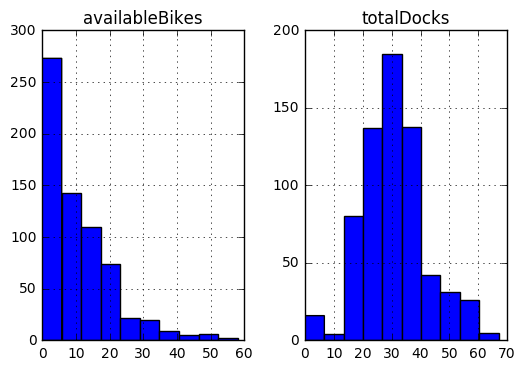

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
#Display histograms of select columns
bikeData[['availableBikes', 'totalDocks']].hist()
plt.show()

In [11]:
#bikeData.availableBikes

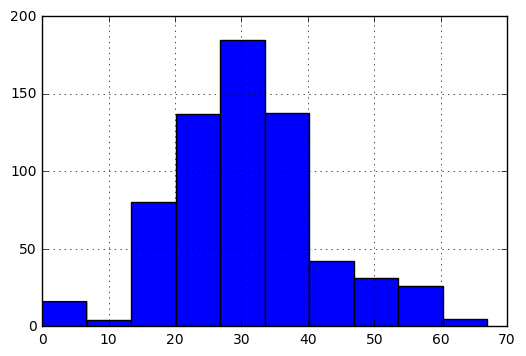

In [12]:
bikeData.totalDocks.hist()
plt.show()

In [13]:
bikeData.shape

(664, 18)

In [14]:
#bikeData.testStation.count()
#len(bikeData[(bikeData.testStation == False)])
#len(bikeData[(bikeData.testStation == True)])
(bikeData[(bikeData.testStation == False)]).count()

altitude                 664
availableBikes           664
availableDocks           664
city                     664
id                       664
landMark                 664
lastCommunicationTime    664
latitude                 664
location                 664
longitude                664
postalCode               664
stAddress1               664
stAddress2               664
stationName              664
statusKey                664
statusValue              664
testStation              664
totalDocks               664
dtype: int64

In [15]:
len(bikeData[(bikeData['statusValue']=='In Service')])

640

In [16]:
664-641


23

In [17]:
bikeData.availableBikes.mean()

10.295180722891565

In [18]:
bikeData.availableBikes.median()

7.0

In [19]:
condition= (bikeData['statusValue']=='In Service')
bikeData[condition]['totalDocks'].mean()

31.48125

In [20]:
bikeData.totalDocks.mean()

30.676204819277107

In [21]:
bikeData[condition]['totalDocks'].median()

31.0

In [51]:
import sqlite3 as lite
con = lite.connect('C:\\sqlite3\\citi_bike.db')
cur = con.cursor()

In [23]:
#Don't run it twice
#('CREATE TABLE citibike_reference (id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT )')
#with con:
    #cur.execute('CREATE TABLE citibike_reference(id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT)')

In [24]:
#stAddres2 was mistyped hence the old table dropped and new correct name created
#since tale can't be created and filled with same data more than once it is better shift these cells to the top
#and remember not to run all cells (from top to bottom)
#with con:
    #cur.execute('CREATE TABLE citibike_ref(id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT)')

In [25]:
#old one dropped
#with con:
    #cur.execute('DROP TABLE citibike_reference')

In [26]:
#sql statement to enter all the data(rows)
sql = 'INSERT INTO citibike_ref(id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location)VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)' 

In [27]:
#loop fills the table just created using json datablase from the server/site
#only the relevant columns were taken
#with con:
    #for station in r.json()['stationBeanList']:
            #cur.execute(sql, (station['id'], station['totalDocks'], station['city'], station['altitude'], station['stAddress2'], station['longitude'], station['postalCode'], station['testStation'], station['stAddress1'], station['stationName'], station['landMark'], station['latitude'], station['location'])) 

In [28]:
bikeData.id.head()

0     72
1     79
2     82
3     83
4    116
Name: id, dtype: int64

In [29]:
#to a list
station_ids=bikeData.id.tolist()
station_ids[0:5]

[72, 79, 82, 83, 116]

In [30]:
#to a string with appropriate label
station_ids = ['_' + str(x) + ' INT' for x in station_ids]
station_ids[0:5]

['_72 INT', '_79 INT', '_82 INT', '_83 INT', '_116 INT']

In [32]:
#creating table, concatenating the string and joining all the station ids (now with '_' and 'INT' added)
#put to sleep as table object has already been cerated
#sleep
#with con:
    #cur.execute("CREATE TABLE available_bikes(execution_time INT, " + ", ".join(station_ids) + ");")


In [36]:
#datetime object package
import time  

#package for parsing string into python datetime object
from dateutil.parser import parse 

import collections

#take the string and parse it into a Python datetime object
#exec_time = parse(r.json()['executionTime'])
exec_time = parse(r.json()['executionTime'])


In [37]:
#r.json()['executionTime']
#exec_time
#x = exec_time.strftime('%s')
#x

In [ ]:
#datetime.datetime(2012,4,1,0,0).timestamp()
#1333234800.0
#here the code deviates from that used in thinkful
with con:
    #cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.timestamp(),))
    

In [33]:
with con:
    k=cur.execute('SELECT * FROM available_bikes')
    
k

In [38]:
#the dictionary will store available bikes by station
id_bikes = collections.defaultdict(int)

#loop through the stations  in the station list
for station in r.json()['stationBeanList']:
    id_bikes[station['id']]=station['availableBikes']

In [39]:
xyz = {str(k):str(v) for k,v in id_bikes.items()}
xyz #finally it is working

{'116': '14',
 '119': '4',
 '120': '1',
 '127': '3',
 '128': '9',
 '137': '0',
 '143': '11',
 '144': '12',
 '146': '16',
 '147': '27',
 '150': '11',
 '151': '19',
 '152': '18',
 '153': '17',
 '157': '5',
 '161': '0',
 '164': '35',
 '167': '14',
 '168': '20',
 '173': '51',
 '174': '3',
 '195': '7',
 '2000': '21',
 '2001': '15',
 '2002': '10',
 '2003': '10',
 '2004': '15',
 '2005': '5',
 '2006': '48',
 '2008': '1',
 '2009': '20',
 '2010': '6',
 '2012': '27',
 '2017': '5',
 '2021': '1',
 '2022': '0',
 '2023': '35',
 '212': '18',
 '216': '12',
 '217': '22',
 '223': '0',
 '224': '21',
 '225': '17',
 '228': '45',
 '229': '11',
 '232': '10',
 '236': '3',
 '237': '4',
 '238': '0',
 '239': '20',
 '241': '0',
 '242': '16',
 '243': '13',
 '244': '0',
 '245': '16',
 '247': '5',
 '248': '5',
 '249': '25',
 '251': '14',
 '252': '0',
 '253': '7',
 '254': '0',
 '257': '29',
 '258': '0',
 '259': '34',
 '260': '10',
 '261': '1',
 '262': '7',
 '264': '13',
 '265': '15',
 '266': '0',
 '267': '3',
 '268': 

In [ ]:
#the dictionary will store available bikes by station
id_bikes = collections.defaultdict(int)

#loop through the stations  in the station list
for station in r.json()['stationBeanList']:
    id_bikes[station['id']]=station['availableBikes']





with con:
    for k, v in id_bikes.items(): #changed back  to id_bikes as problem was with converting exec_time to str
        
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + str(exec_time.timestamp()) + ";")


In [ ]:
#not working cause programs needs to make fresh connection every minute
#get fresh values for id_bikes and other dataframe
#finally save all in the sql table
#import the whole table with data for the hour (better take data during the day) 
#Run analytics to find out data characteristics
#Interpret and decide help to make decisions
#Implement and recollect the data
def update():
    import time
    #print ('Hello World!')
    with con:
    for k, v in id_bikes.items(): #changed back  to id_bikes as problem was with converting exec_time to str
        
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + str(exec_time.timestamp()) + ";")

    time.sleep(60)
for i in range(60):
    update()

In [ ]:
#xyz = {str(k):str(v) for k,v in id_bikes.items()}
#xyz #finally it is working

In [40]:
"""
import threading
def f():
    for i in range (60):
        print ("Running minute is: ", i)
        threading.Timer(60, f).start()
        #not working just prints 60 iteration
#f()"""

In [59]:
#write the whole function to collect the data for the hour
def update_available_bike():
    #make fresh  connetion everytime and not work with the old data
    r = requests.get('http://www.citibikenyc.com/stations/json')
    
    #get the minute by minute time of execution
    exec_time =  parse(r.json()['executionTime'])
    print (exec_time)            #actual time
    print (exec_time.timestamp())  #time stamp in secs to create unique id to work with -- in this stamp -got certain data
    #workds fine and prints resulsts
    
    #create entry for execution time by inserting into db
    with con:
        cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.timestamp(),))
        
        #iterate through stations in list
        id_bikes = collections.defaultdict(int)  #default dict to store available bikes by station
        
        #loop trough stations in station list
        for station in r.json()['stationBeanList']:
            id_bikes[station['id']]=station['availableBikes']
        
        #iterate through defaultdict to update values in db
        with con:
            for k, v in id_bikes.items():
                cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + str(exec_time.timestamp()) + ";")
                #cur.execute("UPDATE available_bikes SET _" + str(k) "=" + str(v) + "WHERE execution_time = " + exec_time.timestamp() + ";")
            
        
#test it now
#update_available_bike()

In [61]:
#collecting data once each minute for 60 minutes
for i in range(60):
    import time
    update_available_bike()
    print ('This is data from minute: ', i)
    time.sleep(60)

2016-12-27 11:41:53
1482818213.0
This is data from minute:  0
2016-12-27 11:42:55
1482818275.0
This is data from minute:  1
2016-12-27 11:44:08
1482818348.0
This is data from minute:  2
2016-12-27 11:45:10
1482818410.0
This is data from minute:  3
2016-12-27 11:46:12
1482818472.0
This is data from minute:  4
2016-12-27 11:47:14
1482818534.0
This is data from minute:  5
2016-12-27 11:48:06
1482818586.0
This is data from minute:  6
2016-12-27 11:49:19
1482818659.0
This is data from minute:  7
2016-12-27 11:50:11
1482818711.0
This is data from minute:  8
2016-12-27 11:51:03
1482818763.0
This is data from minute:  9
2016-12-27 11:52:15
1482818835.0
This is data from minute:  10
2016-12-27 11:53:17
1482818897.0
This is data from minute:  11
2016-12-27 11:54:20
1482818960.0
This is data from minute:  12
2016-12-27 11:55:12
1482819012.0
This is data from minute:  13
2016-12-27 11:56:14
1482819074.0
This is data from minute:  14
2016-12-27 11:57:16
1482819136.0
This is data from minute:  15
20

In [47]:
#testing partial code above
#Finally this section is working
"""#checked the middle piece and it is working
with con:
        cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.timestamp(),))
        
        #iterate through stations in list
        id_bikes = collections.defaultdict(int)  #default dict to store available bikes by station
        
        #loop trough stations in station list
        for station in r.json()['stationBeanList']:
            id_bikes[station['id']]=station['availableBikes']
#time stamp is there but available bikes all empty"""

In [58]:
#testing and fixing bugs
#This section is working
"""
with con:
    for k, v in id_bikes.items():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + str(exec_time.timestamp()) + ";")
        #cur.execute("UPDATE available_bikes SET _" + str(k) " = " + str(v) + "WHERE execution_time = " + exec_time.timestamp() + ";")
        #cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")
        """

In [60]:
#id_bikes